In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [90]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col]

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
5,1.7,0.4,setosa
6,1.4,0.3,setosa
7,1.5,0.2,setosa
8,1.4,0.2,setosa
9,1.5,0.1,setosa


In [92]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [93]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [94]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
y = df['species'].map(species_to_num)

In [95]:
y = y.astype(int)
y.unique()

array([0, 1, 2], dtype=int64)

In [96]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

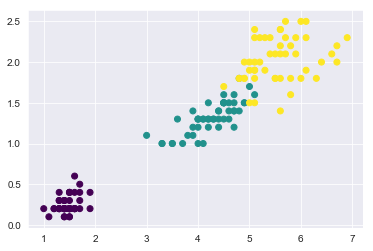

In [97]:
plt.scatter(X["petal_length"],X["petal_width"],c=y,cmap='viridis')

In [98]:
clf.predict([[6, 2]])

array([2])

In [99]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [100]:
xx

array([[0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       ...,
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88],
       [0.1 , 0.12, 0.14, ..., 7.84, 7.86, 7.88]])

In [101]:
yy

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.04, 0.04, 0.04, ..., 0.04, 0.04, 0.04],
       ...,
       [2.94, 2.94, 2.94, ..., 2.94, 2.94, 2.94],
       [2.96, 2.96, 2.96, ..., 2.96, 2.96, 2.96],
       [2.98, 2.98, 2.98, ..., 2.98, 2.98, 2.98]])

In [102]:
np.c_[xx.ravel(), yy.ravel()]

array([[0.1 , 0.  ],
       [0.12, 0.  ],
       [0.14, 0.  ],
       ...,
       [7.84, 2.98],
       [7.86, 2.98],
       [7.88, 2.98]])

In [103]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [104]:
z

array([0, 0, 0, ..., 2, 2, 2])

In [105]:
len(z)

58500

In [106]:
z = z.reshape(xx.shape)

In [107]:
z

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

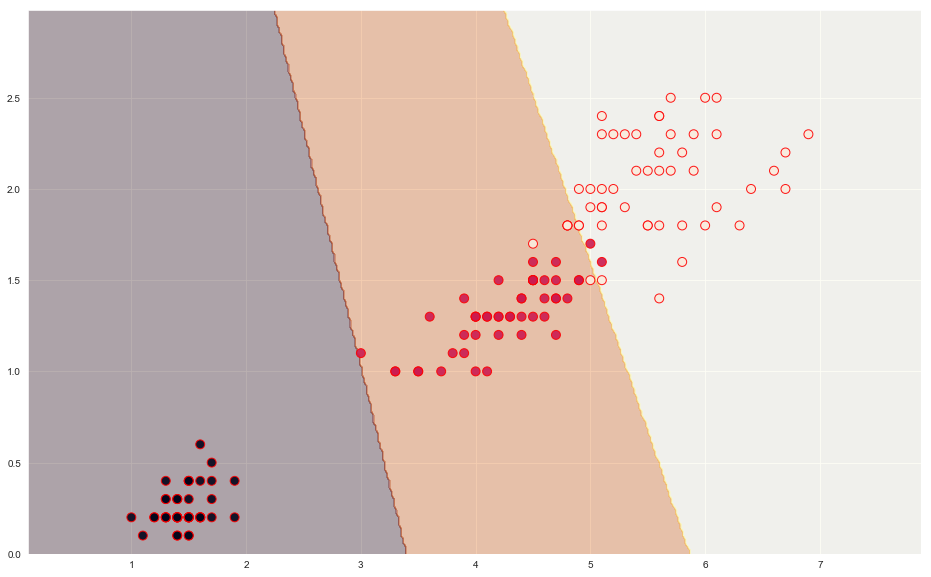

In [108]:
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='r');

## Linear SVM Implementation

In [109]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['species'],axis=1)
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [110]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [111]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#### Cross Validation within Train Dataset

In [113]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9404
Accuracy SD: 		 0.0664


In [114]:
res

array([0.92307692, 1.        , 0.84615385, 1.        , 0.91666667,
       1.        , 1.        , 0.81818182, 1.        , 0.9       ])

In [115]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [116]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 32,  5],
       [ 0,  2, 42]], dtype=int64)

In [117]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9429
Recall Score: 		 0.9417
F1 Score: 		 0.9414


#### Cross Validation within Test Dataset

In [118]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

In [119]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [120]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9690
Recall Score: 		 0.9667
F1 Score: 		 0.9658


In [121]:
print("Average Accuracy: \t {0:.4f}".format(np.mean(y_test_pred)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(y_test_pred)))

Average Accuracy: 	 0.8000
Accuracy SD: 		 0.7024


## Polynomial SVM Implementation

In [122]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(["species"],axis=1)
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [123]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [124]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#### Cross Validation within Train Dataset

In [126]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9027
Accuracy SD: 		 0.0663


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

In [127]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [128]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0, 13, 31]], dtype=int64)

In [129]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9198
Recall Score: 		 0.8917
F1 Score: 		 0.8904


#### Cross Validation within Test Dataset

In [130]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_std_test), y_test, cv=3)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [131]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  5,  1]], dtype=int64)

In [132]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.8796
Recall Score: 		 0.8333
F1 Score: 		 0.7873


In [133]:
print("Average Accuracy: \t {0:.4f}".format(np.mean(y_test_pred)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(y_test_pred)))

Average Accuracy: 	 0.6667
Accuracy SD: 		 0.5375


***
# Gaussian Radial Basis Function (rbf)

In [77]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### Scale Features

In [78]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [79]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [80]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [81]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [82]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]], dtype=int64)

In [83]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.9586
Recall Score: 		 0.9583
F1 Score: 		 0.9584


cross validation with test dataset

In [84]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_std_test), y_test, cv=3)

In [85]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [86]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.9422
Recall Score: 		 0.9333
F1 Score: 		 0.9290


In [88]:
print("Average Accuracy: \t {0:.4f}".format(np.mean(y_test_pred)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(y_test_pred)))

Average Accuracy: 	 0.7667
Accuracy SD: 		 0.6675
